In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('L')
print(np.array(img).shape)
np.array(img)

from sklearn.datasets import fetch_openml
digits = fetch_openml('mnist_784')
digits.data.shape

images = digits.data.values.reshape(-1, 28, 28)

from sklearn.decomposition import PCA

pca = PCA(n_components=50)

X_transformed = pca.fit_transform(digits.data.astype(float))
X_transformed.shape

proj = np.dot(digits.data.astype(float) - pca.mean_, pca.components_.T)
proj.shape

X_restored = pca.inverse_transform(X_transformed)
X_restored.shape

%matplotlib inline

(500, 750)


Задача 1. Выпишите явное линейное преобразование, которое отображает точку из подространства главных компонент в исходное пространство (заполните ??? так, чтобы результат совпал с результатом в предыдущей ячейке)

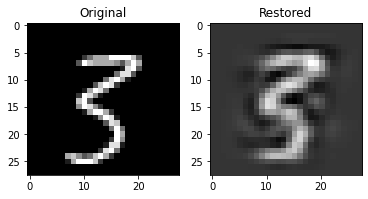

In [4]:
res = np.dot(X_transformed, pca.components_) + pca.mean_

i = 540
fig, ax = plt.subplots(1, 2)
ax[0].imshow(images[i], cmap='gray')
ax[1].imshow(res[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored')
plt.show()

Задача 2. Определите, сколько нужно взять главных компонент, чтобы объяснить 99%, 95%, 90%, и 85% исходной дисперсии.

In [19]:
pca = PCA()
X_transformed = pca.fit_transform(digits.data.astype(float)) 
variance = pca.explained_variance_ratio_.cumsum().round(2) * 100
exp99 = int(round(np.mean(np.where(variance == 99))))
exp95 = int(round(np.mean(np.where(variance == 95))))
exp90 = int(round(np.mean(np.where(variance == 90))))
exp85 = int(round(np.mean(np.where(variance == 85))))
print('Количество главных компонент для 99% {}, для 95% {}, для 90% {}, для 85% {}.'.format(exp99, exp95, exp90, exp85))

Количество главных компонент для 99% 338, для 95% 153, для 90% 86, для 85% 58.


Задача 3. Нарисуйте пример исходного изображения и результат восстановления из числа компонент, которое вы нашли в предыдущей задаче.

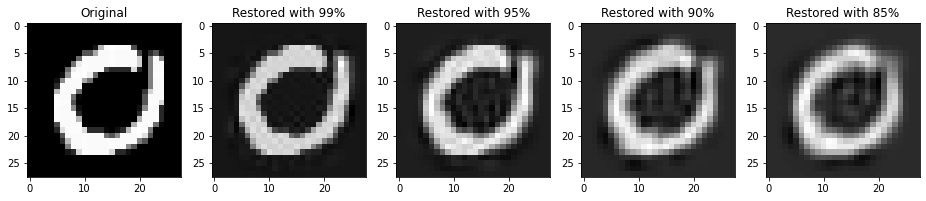

In [21]:
pca99 = PCA(exp99)
trans99 = pca99.fit_transform(digits.data.astype(float))
restored99 = pca99.inverse_transform(trans99)
pca95 = PCA(exp95)
trans95 = pca95.fit_transform(digits.data.astype(float))
restored95 = pca95.inverse_transform(trans95)
pca90 = PCA(exp90)
trans90 = pca90.fit_transform(digits.data.astype(float))
restored90 = pca90.inverse_transform(trans90)
pca85 = PCA(exp85)
trans85 = pca85.fit_transform(digits.data.astype(float))
restored85 = pca85.inverse_transform(trans85)
i = 121
fig, ax = plt.subplots(1, 5, figsize=(16, 7))
ax[0].imshow(images[i], cmap="gray")
ax[1].imshow(restored99[i].reshape(28, 28), cmap="gray")
ax[2].imshow(restored95[i].reshape(28, 28), cmap="gray")
ax[3].imshow(restored90[i].reshape(28, 28), cmap="gray")
ax[4].imshow(restored85[i].reshape(28, 28), cmap="gray")
ax[0].set_title("Original")
ax[1].set_title("Restored with 99%")
ax[2].set_title("Restored with 95%")
ax[3].set_title("Restored with 90%")
ax[4].set_title("Restored with 85%")
plt.show()

Задача 4. Предложите способ генерации новых изображений с числами и приведите примеры сгенерированных картинок.